In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
data = pd.read_csv("patient_diagnosis.csv")
data

,ID,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


Each audio file name is divided into 5 elements, separated with underscores (_).

1. Patient number (101,102,...,226)
2. Recording index
3. Chest location 
      a. Trachea (Tc)
      b. Anterior left (Al)
      c. Anterior right (Ar)
      d. Posterior left (Pl)
      e. Posterior right (Pr)
      f. Lateral left (Ll)
      g. Lateral right (Lr)
4. Acquisition mode 
     a. sequential/single channel (sc), 
     b. simultaneous/multichannel (mc)
5. Recording equipment 
     a. AKG C417L Microphone (AKGC417L), 
     b. 3M Littmann Classic II SE Stethoscope (LittC2SE), 
     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200), 
     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)


The abbreviations used in the diagnosis file are:
- COPD: Chronic Obstructive Pulmonary Disease
- LRTI: Lower Respiratory Tract Infection
- URTI: Upper Respiratory Tract Infection

The Respiratory Sound Database was created by two research teams in Portugal and Greece. It includes 920 annotated recordings of varying length - 10s to 90s. These recordings were taken from 126 patients. There are a total of 5.5 hours of recordings containing 6898 respiratory cycles - 1864 contain crackles, 886 contain wheezes and 506 contain both crackles and wheezes. The data includes both clean respiratory sounds as well as noisy recordings that simulate real life conditions. The patients span all age groups - children, adults and the elderly.

This Kaggle dataset includes:

920 .wav sound files
920 annotation .txt files
A text file listing the diagnosis for each patient
A text file explaining the file naming format
A text file listing 91 names (filename_differences.txt )
A text file containing demographic information for each patient
Note:

filename_differences.txt is a list of files whose names were corrected after this dataset's creators found a bug in the original file naming script. It can now be ignored.

In [3]:
data['Diagnosis'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Bronchiolitis      6
Pneumonia          6
LRTI               2
Asthma             1
Name: Diagnosis, dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


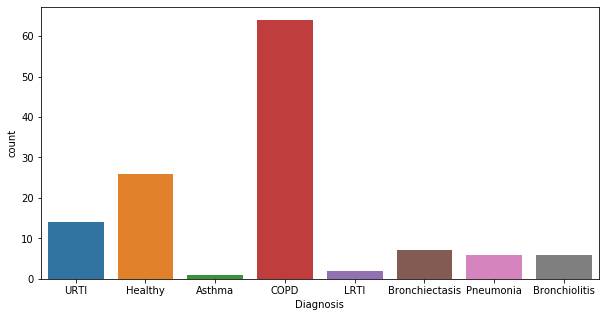

In [6]:
sns.countplot(data['Diagnosis'])

As the last 5 diseases are rare in this dataset, I will drop the patients with those conditions and focus only on the top 3 (COPD, Healthy and URTI).

In [7]:
import os
all_files = os.listdir("audio_and_txt_files")
files = []
for i in all_files:
    if i[-3:] == "wav":
        files.append(i)
files = pd.DataFrame(files, columns = {"Name"})
files

,Name
0,101_1b1_Al_sc_Meditron.wav
1,101_1b1_Pr_sc_Meditron.wav
2,102_1b1_Ar_sc_Meditron.wav
3,103_2b2_Ar_mc_LittC2SE.wav
4,104_1b1_Al_sc_Litt3200.wav
...,...
915,224_1b2_Al_sc_Meditron.wav
916,225_1b1_Pl_sc_Meditron.wav
917,226_1b1_Al_sc_Meditron.wav
918,226_1b1_Ll_sc_Meditron.wav


In [8]:
import wave
import contextlib
files["Duration"] = 0
for i in range(len(files)):
    fname = "audio_and_txt_files/" + files["Name"][i]
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        files["Duration"][i] = duration

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'count')

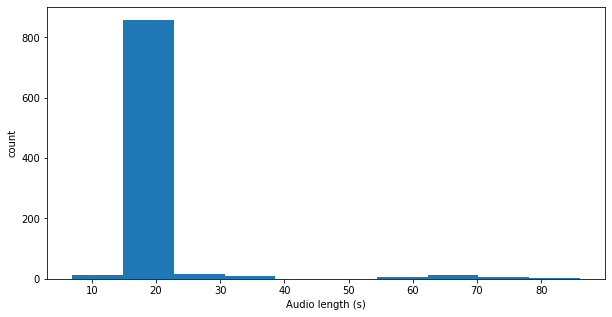

In [9]:
plt.hist(files["Duration"])
plt.xlabel('Audio length (s)')
plt.ylabel('count')

In [32]:
print(files["Duration"].min())
print(files["Duration"].max())

7
86


In [10]:
print("Value counts of audio length: ")
files["Duration"].value_counts()


Value counts of audio length: 


20    822
19     12
18      7
30      6
16      5
33      5
32      5
14      4
15      4
17      4
12      4
62      4
71      3
66      3
21      3
67      3
65      2
63      2
24      2
28      2
68      2
23      2
73      1
74      1
69      1
75      1
82      1
7       1
29      1
57      1
9       1
26      1
25      1
22      1
11      1
86      1
Name: Duration, dtype: int64

In [35]:
files = files[files["Duration"]==20]

In [37]:
files.reset_index(drop=True, inplace=True)
files

,Name,Duration
0,101_1b1_Al_sc_Meditron.wav,20
1,101_1b1_Pr_sc_Meditron.wav,20
2,102_1b1_Ar_sc_Meditron.wav,20
3,103_2b2_Ar_mc_LittC2SE.wav,20
4,105_1b1_Tc_sc_Meditron.wav,20
...,...,...
817,224_1b2_Al_sc_Meditron.wav,20
818,225_1b1_Pl_sc_Meditron.wav,20
819,226_1b1_Al_sc_Meditron.wav,20
820,226_1b1_Ll_sc_Meditron.wav,20


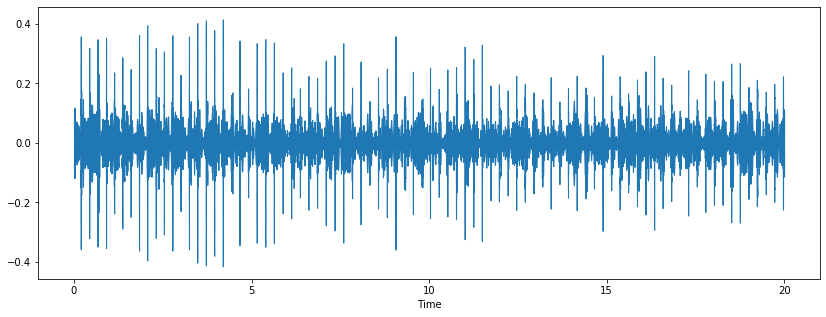

In [38]:
import librosa
import librosa.display
#This code will decompose the audio file as a time series y and the variable sr holds the sampling rate of the time series.
y, sr = librosa.load("audio_and_txt_files/" + files["Name"][0])
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

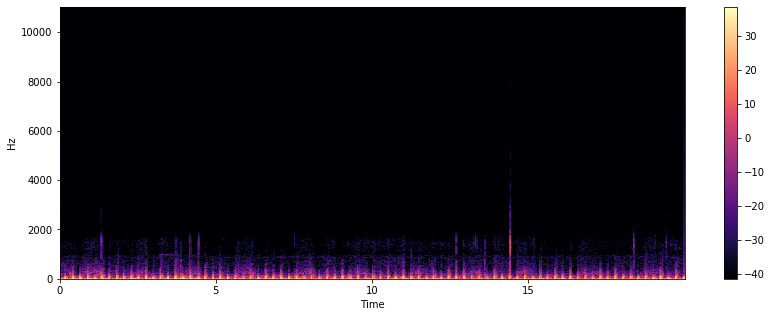

In [39]:
#STFT converts signals such that we can know the amplitude of the given frequency at a given time. 
#Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
y = librosa.stft(y)
ydb = librosa.amplitude_to_db(abs(y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

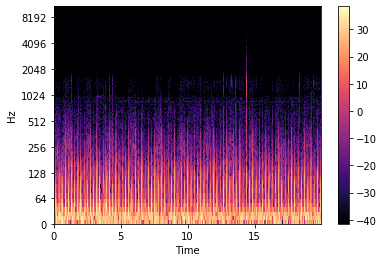

In [40]:
librosa.display.specshow(ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[0.06973912 0.10266001 0.09116188 ... 0.08305359 0.08018959 0.08612607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


(20, 862)


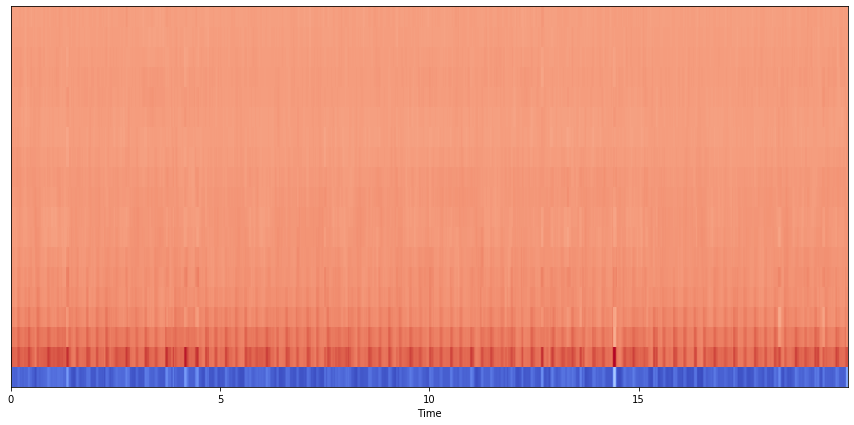

In [41]:
y, sr = librosa.load("audio_and_txt_files/" + files["Name"][0])
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [42]:
data = data[(data.Diagnosis != "Bronchiectasis") & (data.Diagnosis != "Pneumonia") & (data.Diagnosis != "Bronchiolitis")
 & (data.Diagnosis != "LRTI")  & (data.Diagnosis != "Asthma")]

In [43]:
data.reset_index(drop=True, inplace=True)

In [44]:
files['Diagnosis'] = ""

for i in range(len(files)):
    for j in range(len(data)):
        if files['Name'][i][:3] == str(data['ID'][j]):
            if data['Diagnosis'][j] == "Healthy":
                files['Diagnosis'][i] = 0
            elif data['Diagnosis'][j] == "URTI":
                files['Diagnosis'][i] = 1
            else:
                files['Diagnosis'][i] = 2

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [45]:
files = files[(files.Diagnosis != "")]
files.reset_index(drop=True, inplace=True)
print(len(files))

753


In [46]:
files['Diagnosis'].value_counts()

2    702
0     30
1     21
Name: Diagnosis, dtype: int64

In [47]:
copd = files[files['Diagnosis'] == 2]
files = files[files['Diagnosis'] != 2]

In [48]:
copd = copd["Name"].tolist()

In [49]:
import random
random.seed(0)
random.shuffle(copd)
copd = copd[:30]

In [50]:
copd = pd.DataFrame(copd, columns = {"Name"})
copd["Diagnosis"] = 2

In [51]:
#copd

In [52]:
frame = [copd, files]
files = pd.concat(frame)
files

,Name,Diagnosis,Duration
0,139_1b1_Ll_sc_Litt3200.wav,2,NaN
1,192_2b2_Al_mc_LittC2SE.wav,2,NaN
2,130_3b3_Ll_mc_AKGC417L.wav,2,NaN
3,146_2b4_Pr_mc_AKGC417L.wav,2,NaN
4,211_1p2_Pl_mc_AKGC417L.wav,2,NaN
...,...,...,...
705,210_1b1_Al_sc_Meditron.wav,1,20.0
735,217_1b1_Tc_sc_Meditron.wav,0,20.0
750,224_1b1_Tc_sc_Meditron.wav,0,20.0
751,224_1b2_Al_sc_Meditron.wav,0,20.0


In [53]:
files.reset_index(drop=True, inplace=True)

In [54]:
files['Diagnosis'].value_counts()

0    30
2    30
1    21
Name: Diagnosis, dtype: int64

In [55]:
#testing on one data point
import librosa
l = []
for i in range(2):
    to_add = []
    file_name = "audio_and_txt_files\\" + files['Name'][i] 
    y, sr = librosa.load(file_name, mono=True) 
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    for n in mfcc:
            to_add.append(np.mean(n))
    print(to_add)
    l.append(to_add)
print(pd.DataFrame(l))

[-465.58228, 98.74537, 76.79873, 49.866917, 26.237446, 10.393363, 2.7319372, 1.4064126, 4.0069156, 8.207423, 11.983673, 13.981034, 13.818648, 11.926729, 9.04424, 5.857134, 2.9632666, 0.8996396, -0.012896294, 0.13519579]
[-521.53406, 109.28014, 52.338947, 43.406532, 37.1964, 28.859129, 23.829058, 19.35292, 16.28666, 12.706728, 10.337368, 9.455694, 8.566476, 7.349967, 6.7606435, 6.8511887, 6.3832703, 5.3520317, 4.632221, 4.461507]
           0           1          2          3          4          5   \
0 -465.582275   98.745369  76.798729  49.866917  26.237446  10.393363   
1 -521.534058  109.280144  52.338947  43.406532  37.196400  28.859129   

          6          7          8          9          10         11  \
0   2.731937   1.406413   4.006916   8.207423  11.983673  13.981034   
1  23.829058  19.352921  16.286659  12.706728  10.337368   9.455694   

          12         13        14        15        16        17        18  \
0  13.818648  11.926729  9.044240  5.857134  2.963267  0

In [56]:
import librosa

files["chroma"] = ""
files["spec_cent"] = ""
files["spec_bw"] = ""
files["rolloff"] = ""
files["zcr"] = ""
feature = []


for i in range(len(files)):
    file_name = "audio_and_txt_files\\" + files['Name'][i]
    y, sr = librosa.load(file_name, mono=True) 
    to_add = []
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    for n in mfcc:
        to_add.append(np.mean(n))
    files["chroma"][i] = np.mean(chroma_stft)
    files["spec_cent"][i] = np.mean(spec_cent)
    files["spec_bw"][i] = np.mean(spec_bw)
    files["rolloff"][i] = np.mean(rolloff)
    files["zcr"][i] = np.mean(zcr)
    feature.append(to_add)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is

In [68]:
feature = pd.DataFrame(feature)
dataset = pd.concat([files, feature], axis=1)
dataset = dataset.drop("Duration", axis = 1)
dataset

,Name,Diagnosis,chroma,spec_cent,spec_bw,rolloff,zcr,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,139_1b1_Ll_sc_Litt3200.wav,2,0.625209,128.792152,167.45182,260.005035,0.006691,-465.582275,98.745369,76.798729,...,11.983673,13.981034,13.818648,11.926729,9.044240,5.857134,2.963267,0.899640,-0.012896,0.135196
1,192_2b2_Al_mc_LittC2SE.wav,2,0.736495,296.604848,1176.07726,134.257773,0.00311,-521.534058,109.280144,52.338947,...,10.337368,9.455694,8.566476,7.349967,6.760643,6.851189,6.383270,5.352032,4.632221,4.461507
2,130_3b3_Ll_mc_AKGC417L.wav,2,0.769442,303.648868,1114.230368,215.919073,0.003684,-365.653412,131.067627,54.742107,...,10.508411,9.880175,8.492767,6.792264,7.946524,9.339125,9.460333,9.209770,7.225302,6.011478
3,146_2b4_Pr_mc_AKGC417L.wav,2,0.749667,953.226044,2141.664228,1776.351865,0.010474,-660.967957,97.862328,37.713871,...,7.592703,11.820913,5.283925,9.235822,3.112013,7.178078,2.460669,6.977630,1.654629,5.481886
4,211_1p2_Pl_mc_AKGC417L.wav,2,0.707438,362.830229,1083.787073,398.526631,0.006638,-188.967621,173.233414,54.462906,...,3.529143,7.497959,6.653170,7.651019,2.769567,5.359830,4.604753,5.307493,1.061455,3.347937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,210_1b1_Al_sc_Meditron.wav,1,0.796769,294.556099,1059.417589,251.578757,0.003527,-442.959320,123.416710,48.201134,...,10.990425,6.134804,7.967783,11.721609,9.844307,5.708146,4.863005,5.954933,5.485080,3.803581
77,217_1b1_Tc_sc_Meditron.wav,0,0.799735,462.366021,1560.115532,340.64678,0.004666,-525.547974,118.839691,60.257385,...,17.669991,13.096128,7.787009,14.614554,7.213005,11.828286,-1.329551,6.570755,1.513043,7.030395
78,224_1b1_Tc_sc_Meditron.wav,0,0.811759,219.157204,997.983715,84.184332,0.001772,-526.952026,74.237419,54.045582,...,16.455267,14.632391,12.722718,10.896214,9.219386,8.067340,7.571384,7.405199,7.094012,6.627250
79,224_1b2_Al_sc_Meditron.wav,0,0.804138,259.906546,1112.350999,114.273362,0.002066,-547.450256,75.989037,54.627899,...,13.006478,11.289015,9.783734,8.949249,8.182634,7.447599,6.689751,6.208925,5.999746,5.930220


In [69]:
dataset.to_csv("dataset2.csv", index = False)

In [2]:
dataset = pd.read_csv("dataset2.csv")
dataset

,Name,Diagnosis,chroma,spec_cent,spec_bw,rolloff,zcr,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,139_1b1_Ll_sc_Litt3200.wav,2,0.625209,128.792152,167.451820,260.005035,0.006691,-465.582275,98.745369,76.798729,...,11.983673,13.981034,13.818648,11.926729,9.044240,5.857134,2.963267,0.899640,-0.012896,0.135196
1,192_2b2_Al_mc_LittC2SE.wav,2,0.736495,296.604848,1176.077260,134.257773,0.003110,-521.534058,109.280144,52.338947,...,10.337368,9.455694,8.566476,7.349967,6.760643,6.851189,6.383270,5.352032,4.632221,4.461507
2,130_3b3_Ll_mc_AKGC417L.wav,2,0.769443,303.648868,1114.230368,215.919073,0.003684,-365.653412,131.067627,54.742107,...,10.508411,9.880175,8.492767,6.792264,7.946524,9.339125,9.460333,9.209770,7.225302,6.011478
3,146_2b4_Pr_mc_AKGC417L.wav,2,0.749667,953.226044,2141.664228,1776.351865,0.010474,-660.967957,97.862328,37.713871,...,7.592703,11.820913,5.283925,9.235822,3.112013,7.178078,2.460669,6.977630,1.654629,5.481886
4,211_1p2_Pl_mc_AKGC417L.wav,2,0.707438,362.830229,1083.787073,398.526631,0.006638,-188.967621,173.233414,54.462906,...,3.529143,7.497959,6.653170,7.651019,2.769567,5.359830,4.604753,5.307493,1.061455,3.347937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,210_1b1_Al_sc_Meditron.wav,1,0.796769,294.556099,1059.417589,251.578757,0.003527,-442.959320,123.416710,48.201134,...,10.990425,6.134804,7.967783,11.721609,9.844307,5.708146,4.863005,5.954933,5.485080,3.803581
77,217_1b1_Tc_sc_Meditron.wav,0,0.799735,462.366021,1560.115532,340.646780,0.004666,-525.547974,118.839691,60.257385,...,17.669991,13.096128,7.787009,14.614554,7.213005,11.828286,-1.329551,6.570755,1.513043,7.030395
78,224_1b1_Tc_sc_Meditron.wav,0,0.811759,219.157204,997.983715,84.184332,0.001772,-526.952026,74.237419,54.045582,...,16.455267,14.632391,12.722718,10.896214,9.219386,8.067340,7.571384,7.405199,7.094012,6.627250
79,224_1b2_Al_sc_Meditron.wav,0,0.804138,259.906546,1112.350999,114.273362,0.002066,-547.450256,75.989037,54.627899,...,13.006478,11.289015,9.783734,8.949249,8.182634,7.447599,6.689751,6.208925,5.999746,5.930220


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from keras.utils import np_utils
y = dataset["Diagnosis"]
y=np_utils.to_categorical(y)
scaler = StandardScaler()
X = dataset.drop(["Diagnosis", "Name"], axis = 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#print(X_train.shape)
y_train[0]

array([0., 1., 0.], dtype=float32)

In [28]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras import layers

In [29]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(25,)))
model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               13312     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)              

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=5, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 0s 14ms/step - loss: 1.0760 - accuracy: 0.4219 - val_loss: 1.0388 - val_accuracy: 0.4706
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.7692 - accuracy: 0.6562 - val_loss: 0.9419 - val_accuracy: 0.5294
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6697 - accuracy: 0.7656 - val_loss: 0.9880 - val_accuracy: 0.4706
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 0.4980 - accuracy: 0.8125 - val_loss: 0.9027 - val_accuracy: 0.6471
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.5324 - accuracy: 0.7969 - val_loss: 0.9392 - val_accuracy: 0.5294
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.4611 - accuracy: 0.8438 - val_loss: 0.6615 - val_accuracy: 0.6471
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 0.5356 - accuracy: 0.8281 - val_loss: 1.1476 - val_accuracy: 0.5294
Epoch 8/10
13/1

In [31]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7647058963775635


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1)))

[[5 3 0]
 [1 2 0]
 [0 0 6]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.40      0.67      0.50         3
           2       1.00      1.00      1.00         6

    accuracy                           0.76        17
   macro avg       0.74      0.76      0.74        17
weighted avg       0.82      0.76      0.78        17



In [34]:
print(np.argmax(model.predict(X_test), axis=1))

[2 1 0 0 0 1 2 0 1 2 2 1 2 0 1 0 2]


In [35]:
print(np.argmax(y_test, axis=1))

[2 1 0 1 0 0 2 0 0 2 2 0 2 0 1 0 2]


In [58]:
import shap
e = shap.KernelExplainer(model, X_train)
shap_values = e.shap_values(X_test)

In [59]:
X.columns

Index(['chroma', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19'],
      dtype='object')

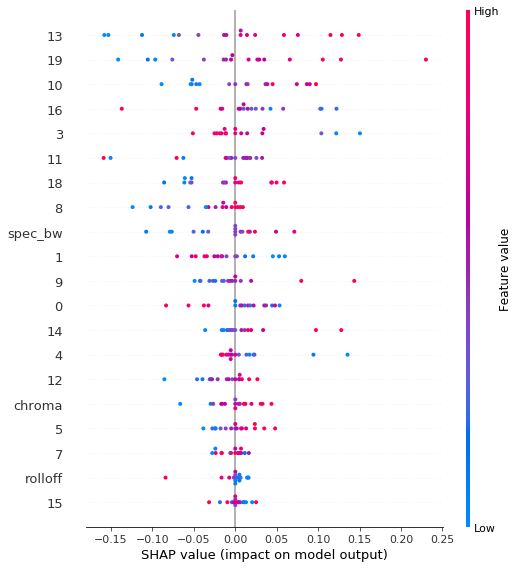

In [60]:
shap.summary_plot(shap_values[0], X_test, feature_names=X.columns)

In [98]:
X1 = X.drop(['chroma', 'spec_cent', 'spec_bw', 'rolloff', 'zcr'], axis = 1)
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=10)

In [99]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [100]:
model2 = Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(20,)))
model2.add(Dense(512, input_shape=(40,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Flatten())

model2.add(Dense(y.shape[1]))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_86 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_68 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_69 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)             

In [101]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model2.fit(X1_train, y_train,batch_size=5, validation_data=(X1_test, y_test),epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 1.0772 - accuracy: 0.40 - ETA: 0s - loss: 1.0764 - accuracy: 0.37 - ETA: 0s - loss: 1.0859 - accuracy: 0.40 - 0s 30ms/step - loss: 1.0859 - accuracy: 0.4062 - val_loss: 1.0142 - val_accuracy: 0.4118
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.8906 - accuracy: 0.80 - ETA: 0s - loss: 1.0455 - accuracy: 0.57 - ETA: 0s - loss: 0.8737 - accuracy: 0.64 - 0s 12ms/step - loss: 0.8737 - accuracy: 0.6406 - val_loss: 0.9941 - val_accuracy: 0.4706
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.80 - ETA: 0s - loss: 0.7423 - accuracy: 0.74 - ETA: 0s - loss: 0.6917 - accuracy: 0.73 - 0s 12ms/step - loss: 0.6917 - accuracy: 0.7344 - val_loss: 0.8368 - val_accuracy: 0.6471
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.2970 - accuracy: 1.00 - ETA: 0s - loss: 0.6050 - accuracy: 0.80 - ETA: 0s - loss: 0.6512 - accuracy: 0.76 - 0s 13ms/step - loss: 

In [102]:
test_accuracy=model2.evaluate(X1_test,y_test,verbose=0)
print(test_accuracy[1])

0.6470588445663452


In [98]:
model_json = model.to_json()
with open("r_model.json", "w") as json_file:
    json_file.write(model_json)

In [99]:
model.save_weights("model_r_weights.h5")

In [100]:
import pickle
pickle.dump(scaler, open('r_scaler.pkl','wb'))

In [11]:
from keras.models import model_from_json
model = model_from_json(open('r_model.json').read())
model.load_weights('model_r_weights.h5')
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [12]:
import pickle
scaler = pickle.load(open('r_scaler.pkl','rb'))

In [30]:
import librosa
import numpy as np

features = []

file_name = "audio_and_txt_files\\" + "162_1b2_Al_mc_AKGC417L.wav"
print(file_name)
y, sr = librosa.load(file_name, mono=True) 
to_add = []

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
for n in mfcc:
    to_add.append(np.mean(n))

features.append(np.mean(chroma_stft))
features.append(np.mean(spec_cent))
features.append(np.mean(spec_bw))
features.append(np.mean(rolloff))
features.append(np.mean(zcr))
features+=to_add
print(features)


audio_and_txt_files\162_1b2_Al_mc_AKGC417L.wav
[0.7450513, 445.89125858895244, 1341.0905199509739, 458.90453365175466, 0.005717762108468677, -345.6954, 133.41628, 52.421753, 26.180548, 22.802114, 23.798199, 21.504902, 16.816936, 14.097556, 12.014849, 9.268595, 6.238333, 5.1382465, 6.806244, 8.050704, 6.8371305, 4.42702, 2.2239282, 1.0227709, 1.988367]


In [31]:
f = np.array(features)
f = f.reshape(1,25)
print(f)
f = scaler.transform(f)
print(f)
pred = model.predict(f)
print(pred)
print(np.amax(pred))
print(np.argmax(model.predict(f), axis=1))

[[ 7.45051324e-01  4.45891259e+02  1.34109052e+03  4.58904534e+02
   5.71776211e-03 -3.45695404e+02  1.33416275e+02  5.24217529e+01
   2.61805477e+01  2.28021145e+01  2.37981987e+01  2.15049019e+01
   1.68169365e+01  1.40975561e+01  1.20148487e+01  9.26859474e+00
   6.23833323e+00  5.13824654e+00  6.80624390e+00  8.05070400e+00
   6.83713055e+00  4.42702007e+00  2.22392821e+00  1.02277088e+00
   1.98836696e+00]]
[[-0.11591311  0.12258466  0.34810635 -0.07120504 -0.12058244  0.89171681
   1.03794184  0.05551912 -0.30062569 -0.62447057 -0.32182954  0.16184439
   0.26253675  0.39151203 -0.12536096 -0.37004327 -1.33634163 -0.54030219
  -0.23697     0.31501232 -0.03646122 -0.12976802 -1.09724465 -1.18903942
  -1.38409242]]
[[1.0324395e-07 2.8903075e-06 9.9999702e-01]]
0.999997
[2]


In [7]:
dataset[dataset.Diagnosis == 1]

,Name,Diagnosis,chroma,spec_cent,spec_bw,rolloff,zcr,0,1,2,...,10,11,12,13,14,15,16,17,18,19
30,101_1b1_Al_sc_Meditron.wav,1,0.799475,128.253957,639.540314,102.794815,0.002122,-528.425842,104.518311,69.906616,...,14.641088,8.428046,3.856079,4.906496,8.398684,9.311785,6.852153,3.964628,2.855870,3.388196
31,101_1b1_Pr_sc_Meditron.wav,1,0.802881,154.397692,806.645490,81.611339,0.001885,-582.505066,95.395264,57.401573,...,14.030277,9.272909,5.845934,7.335799,10.573301,10.616893,7.163810,3.729378,2.664429,3.650914
33,105_1b1_Tc_sc_Meditron.wav,1,0.570168,1136.390290,1831.943905,1779.524390,0.055244,-355.093048,178.763382,22.648882,...,2.103141,7.830877,10.137112,4.151691,2.353108,-0.697931,6.520078,-0.491214,5.028815,6.961808
34,119_1b1_Ar_sc_Meditron.wav,1,0.799380,519.584620,1605.733115,451.660185,0.004736,-608.492188,98.005623,44.809723,...,9.696251,5.522039,8.237214,2.328560,4.352171,7.776548,3.003950,10.977804,4.934601,7.588130
40,129_1b1_Ar_sc_Meditron.wav,1,0.808072,131.825277,730.359166,81.149200,0.001963,-550.246033,102.226517,64.385384,...,10.835720,7.540609,6.850688,7.564134,9.266531,6.486277,3.834033,3.600291,7.029840,9.068089
41,131_1b1_Al_sc_Meditron.wav,1,0.812248,81.212151,397.811419,100.009488,0.001380,-439.078827,80.459358,55.831699,...,13.686272,10.889691,7.664895,6.846547,7.736035,7.802924,6.500015,5.517340,5.839027,6.465936
43,137_1b1_Ar_sc_Meditron.wav,1,0.806009,68.154541,414.158278,59.166348,0.001798,-486.396027,71.752716,57.131603,...,15.447193,15.336225,12.350841,9.344537,8.515828,9.033087,8.856066,7.482340,6.155138,5.967277
44,137_1b1_Ll_sc_Meditron.wav,1,0.804161,90.895445,539.056503,60.053156,0.001678,-513.692566,69.496971,48.873413,...,15.764705,15.720800,12.361768,9.413591,9.112365,9.854388,9.182175,7.245787,6.165965,6.909931
47,148_1b1_Al_sc_Meditron.wav,1,0.748325,257.557785,730.018094,483.535321,0.005341,-424.183105,134.641174,40.497437,...,9.312438,7.233123,5.602582,5.576890,3.685046,1.637889,4.237256,8.287207,6.270468,0.855067
48,150_1b2_Al_sc_Meditron.wav,1,0.801403,224.071606,948.065328,143.712897,0.002658,-454.464172,99.976738,60.786163,...,13.783245,10.631450,9.615624,10.526155,10.689789,8.324887,5.503725,5.826193,6.624102,6.784505
